In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

In [3]:
import os 
os.getcwd()

'C:\\Users\\91705\\Desktop\\EDULYT\\PROJECT 2'

In [4]:
os.chdir('C:\\Users\\91705\\Desktop\\EDULYT\\PROJECT 2')

In [8]:
cct = pd.read_csv('Credit card transactions.csv')
del cct['index']
cct

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",03-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [64]:
pd.options.display.max_rows = 5000

In [65]:
# 1st Question

import pandas as pd

df = pd.read_csv('Credit card transactions.csv')

city_spend = df.groupby('City').agg(total_spend=('Amount', 'sum')).reset_index()

city_spend['percentage_contribution'] = round((city_spend['total_spend'] / df['Amount'].sum()) * 100, 2)

top_5_cities = city_spend.sort_values(by='total_spend', ascending=False).head(5)

print(top_5_cities)


                      City  total_spend  percentage_contribution
170  Greater Mumbai, India    576751476                    14.15
71        Bengaluru, India    572326739                    14.05
8         Ahmedabad, India    567794310                    13.93
126           Delhi, India    556929212                    13.67
267         Kolkata, India    115466943                     2.83


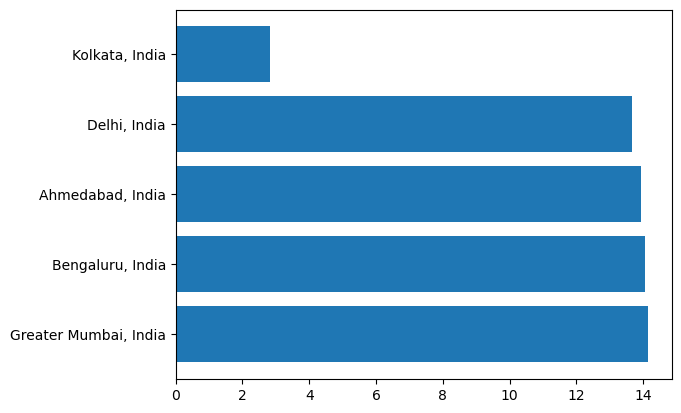

In [66]:
plt.barh(top_5_cities['City'], top_5_cities['percentage_contribution'])
plt.show()

In [67]:
# 2nd question

cct['month'] = pd.DatetimeIndex(cct['Date']).month

highest_expense = pd.pivot_table(cct, values = 'Amount', 
                    index = 'month',
                    columns = 'Card Type',
                    aggfunc = 'sum'
              )
highest_expense
highest_expense['Total'] = highest_expense.sum(axis = 1)
highest_expenses = highest_expense.sort_values('Total', ascending = False).head()
highest_expenses

Card Type,Gold,Platinum,Signature,Silver,Total
month,,,,,
1,110146204,112784373,98919381,109359598,431209556
10,98265077,97459080,115694418,108427432,419846007
12,96458848,101509431,107765498,111201638,416935415
4,100738615,106793699,102329658,106532762,416394734
3,99773193,104760684,91972657,113547912,410054446


In [14]:
del cct['month']

In [68]:
# 3rd Question

import pandas as pd

df = pd.read_csv('Credit card transactions.csv')

df['Total_spend'] = df.sort_values(by = ['Card Type', 'Date']).groupby('Card Type')['Amount'].cumsum()

filtered_df = df[df['Total_spend'] >= 1000000]

# Ranking the filtered data within each Card Type based on total_spend
filtered_df['rank'] = filtered_df.groupby('Card Type')['Total_spend'].rank(method='first')#.astype(int)

result = filtered_df[filtered_df['rank'] == 1]

result.style.hide()

C:\Users\91705\AppData\Local\Temp\ipykernel_19180\4272645153.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rank'] = filtered_df.groupby('Card Type')['Total_spend'].rank(method='first')#.astype(int)


index,City,Date,Card Type,Exp Type,Gender,Amount,Total_spend,rank
13431,"Delhi, India",01-Apr-14,Gold,Grocery,M,23697,1000956,1.000000
13960,"Bengaluru, India",01-Apr-14,Silver,Entertainment,F,172789,1000757,1.000000
18394,"Surandai, India",01-Apr-14,Platinum,Entertainment,F,290618,1060394,1.000000
20659,"Jaipur, India",01-Apr-14,Signature,Bills,F,190198,1073671,1.000000


In [69]:
# 4th question

import pandas as pd

df = pd.read_csv('Credit card transactions.csv')

cte = df.groupby(['City', 'Card Type'], as_index=False).agg(
    amount=('Amount', 'sum'),
    gold_amount=('Amount', lambda x: x[df['Card Type'] == 'Gold'].sum())
)

result = cte.groupby('City', as_index=False).agg(
    total_amount=('amount', 'sum'),
    total_gold_amount=('gold_amount', 'sum')
)
result

result['gold_percentage'] = result['total_gold_amount'] * 100 / result['total_amount']

result = result[(result['total_gold_amount'].notna()) & (result['total_gold_amount'] > 0)]

result = result.sort_values(by='gold_percentage').reset_index(drop=True)

final_result = result[['City', 'gold_percentage']].head(10)

print(final_result)

                  City  gold_percentage
0      Dhamtari, India         0.332988
1         Solan, India         0.368009
2          Suar, India         0.386459
3      Bhiwandi, India         0.391836
4  Bhadrachalam, India         0.400864
5      Lalitpur, India         0.410332
6    Uravakonda, India         0.534991
7        Ranchi, India         0.572557
8     Brahmapur, India         0.590578
9    Samastipur, India         0.681926


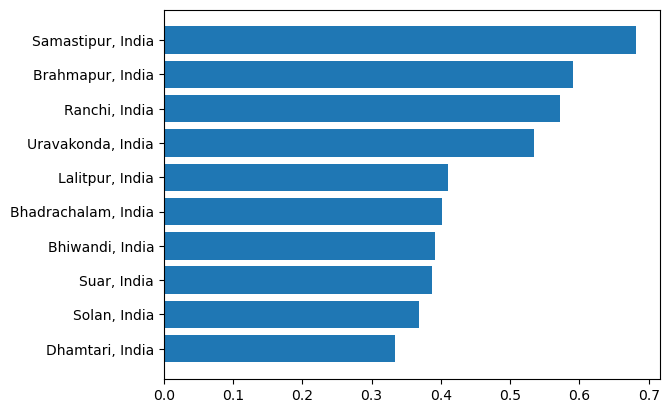

In [70]:
plt.barh(final_result['City'], final_result['gold_percentage'])
plt.show()

In [71]:
# Question 5

# Selecting distinct exp_type
distinct_exp_types = cct['Exp Type'].unique()

# Creating the CTE equivalent in Pandas
cte = cct.groupby(['City', 'Exp Type'])['Amount'].sum().reset_index().rename(columns={'Amount': 'total_amount'})

# Creating ranks based on total_amount
cte['rn_desc'] = cte.groupby('City')['total_amount'].rank(method='dense', ascending=False)
cte['rn_asc'] = cte.groupby('City')['total_amount'].rank(method='dense', ascending=True)

# Finding the lowest and highest exp_type for each city
result = cte.groupby('City').apply(lambda x: pd.Series({
    'lowest_exp_type': x.loc[x['rn_asc'] == 1, 'Exp Type'].values[0],
    'highest_exp_type': x.loc[x['rn_desc'] == 1, 'Exp Type'].values[0]
})).reset_index()

print(result.head(10))


                City lowest_exp_type highest_exp_type
0    Achalpur, India   Entertainment          Grocery
1    Adilabad, India            Food            Bills
2   Adityapur, India         Grocery             Food
3       Adoni, India   Entertainment            Bills
4       Adoor, India           Bills             Fuel
5    Afzalpur, India            Food             Fuel
6    Agartala, India            Food          Grocery
7        Agra, India         Grocery            Bills
8   Ahmedabad, India         Grocery            Bills
9  Ahmednagar, India         Grocery             Fuel


In [72]:
# Question 6

df1 = cct.groupby('Exp Type').apply(
    lambda x: x[x['Gender'] == 'F']['Amount'].sum()
).reset_index(name='Female Contribution')
df1

df2 = cct.groupby(['Exp Type'])['Amount'].sum().reset_index().rename(columns={'Amount': 'Total amount'})
df2
df = df1.merge(df2, on = 'Exp Type')
df

df['Female_percent_contribution'] = df['Female Contribution']/(cct['Amount'].sum()) * 100

result = df[['Exp Type','Female_percent_contribution']]
print(result)

        Exp Type  Female_percent_contribution
0          Bills                    14.234581
1  Entertainment                     8.801914
2           Food                    11.112535
3           Fuel                     9.626956
4        Grocery                     8.973299
5         Travel                     1.370989


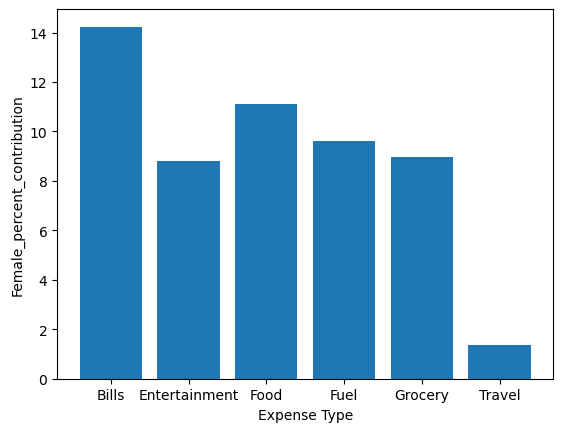

In [74]:
plt.bar(result['Exp Type'], result['Female_percent_contribution'] )
plt.xlabel('Expense Type')
plt.ylabel('Female_percent_contribution')
plt.show()

In [75]:
# 7th Question

df = pd.read_csv('Credit card transactions.csv')

# Extracting year and month from transaction_date
df['yt'] = pd.to_datetime(df['Date']).dt.year
df['mt'] = pd.to_datetime(df['Date']).dt.month

# Grouping by card_type, exp_type, year, and month, then calculate total_spend
cte = df.groupby(['Card Type', 'Exp Type', 'yt', 'mt'], as_index=False)['Amount'].sum()
cte.rename(columns={'Amount': 'total_spend'}, inplace=True)
cte 

# Calculating the previous month's spend using the `shift` function
cte['prev_month_spend'] = cte.sort_values(['yt', 'mt']).groupby(['Card Type', 'Exp Type'])['total_spend'].shift(1)

# Calculating month-over-month growth
cte['month_growth'] = ((cte['total_spend'] - cte['prev_month_spend'])/cte['prev_month_spend'])*100

# Filtering for January 2014 where prev_month_spend is not null
jan_2014_data = cte[(cte['yt'] == 2014) & (cte['mt'] == 1) & (cte['prev_month_spend'].notnull())]

# # Get the top 1 row with the highest month-over-month growth
result = jan_2014_data.sort_values(by='month_growth', ascending=False).head(1).style.hide()

result

Card Type,Exp Type,yt,mt,total_spend,prev_month_spend,month_growth
Gold,Travel,2014,1,2092554,1113534.000000,87.920081


In [76]:
# 8th Question

import pandas as pd
df = pd.read_csv('Credit card transactions.csv')

# Converting transaction_date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtering for transactions that occurred on Saturday or Sunday
weekend_df = df[df['Date'].dt.weekday.isin([5,6])]
weekend_df

# Group by city and calculate the ratio (sum(amount) / count)
grouped = weekend_df.groupby('City').agg(
    total_amount = ('Amount', 'sum'),
    count = ('Amount', 'count')
)

grouped['ratio'] = grouped['total_amount'] * 1.0 / grouped['count']

# Sorting by ratio in descending order and select the top 1 city
result = grouped.sort_values(by='ratio', ascending=False).head(1)

final_result = result[['ratio']].reset_index()

print(final_result)

             City     ratio
0  Sonepur, India  299905.0


In [77]:
# 9th Question

import pandas as pd
df = pd.read_csv('Credit card transactions.csv')

# Adding row numbers within each city
df['Date'] = pd.to_datetime(df['Date'])
df['rn'] = df.sort_values('Date').groupby('City').cumcount() + 1


# Filtering for rows where rank is 1 or 500
filtered_df = df[df['rn'].isin([1, 500])]
filtered_df

# Grouping by city and calculate the date difference
grouped = filtered_df.groupby('City').agg(
    min_date=('Date', 'min'),
    max_date=('Date', 'max'),
    count=('Date', 'count')
)

grouped = grouped[grouped['count'] == 2]  # Only consider cities with exactly 2 rows (rn=1 and rn=500)
grouped['Days_count'] = (grouped['max_date'] - grouped['min_date']).dt.days

# Order by datediff1 and select the top 1 city
result = grouped.sort_values(by='Days_count').head(1)

final_result = result[['Days_count']].reset_index()

print(final_result)


               City  Days_count
0  Bengaluru, India          81
